✅ Herramientas listas para el análisis.
📊 Datos del evento de lluvias generados.

            ANÁLISIS ESTADÍSTICO DEL IMPACTO NACIONAL


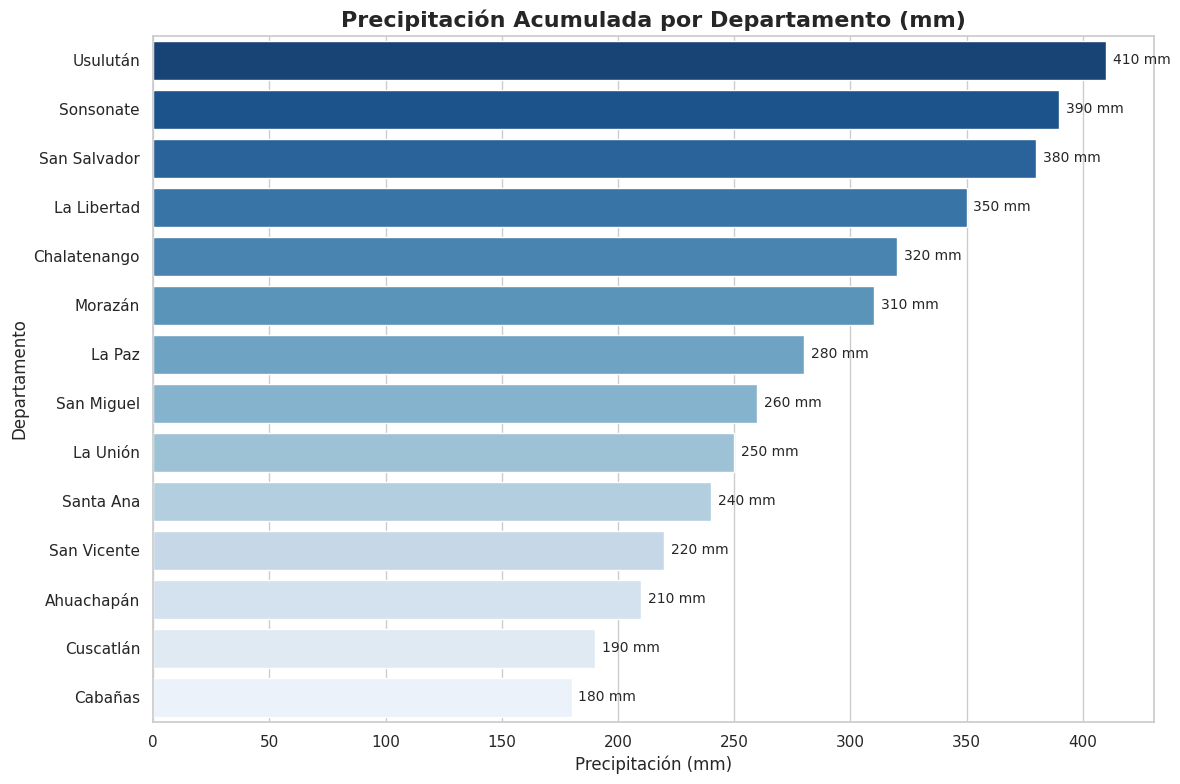

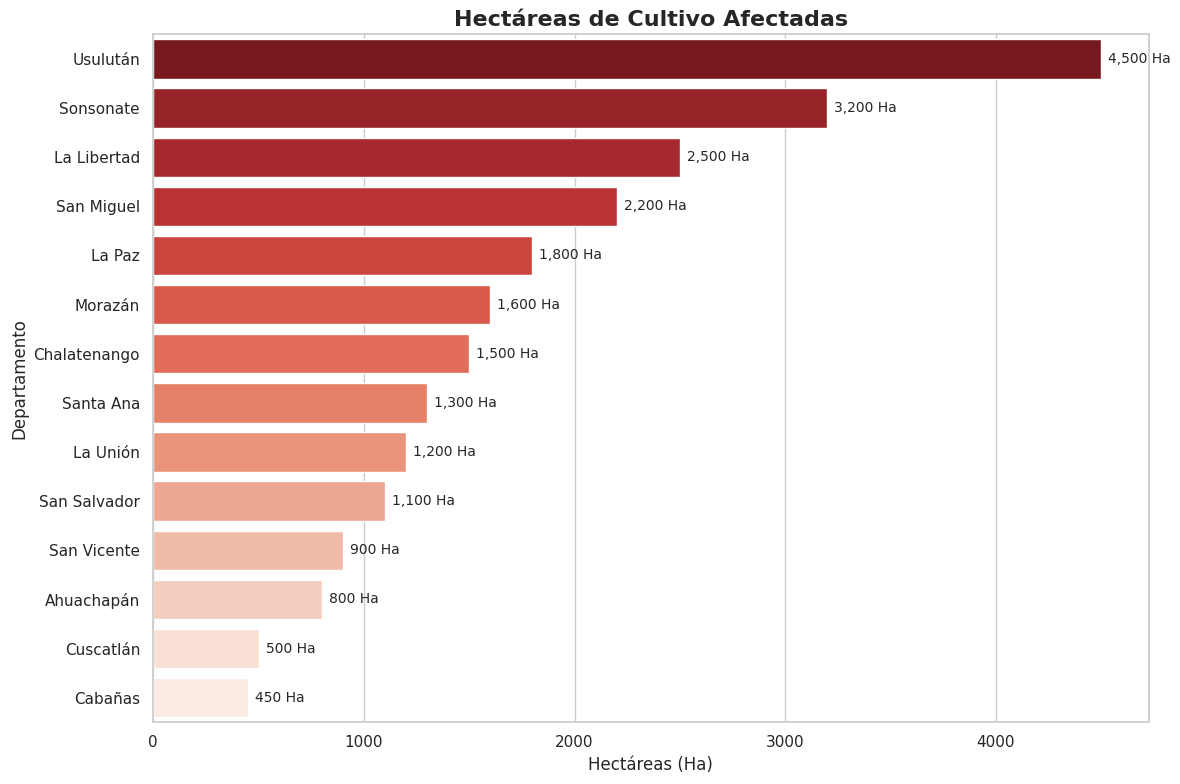

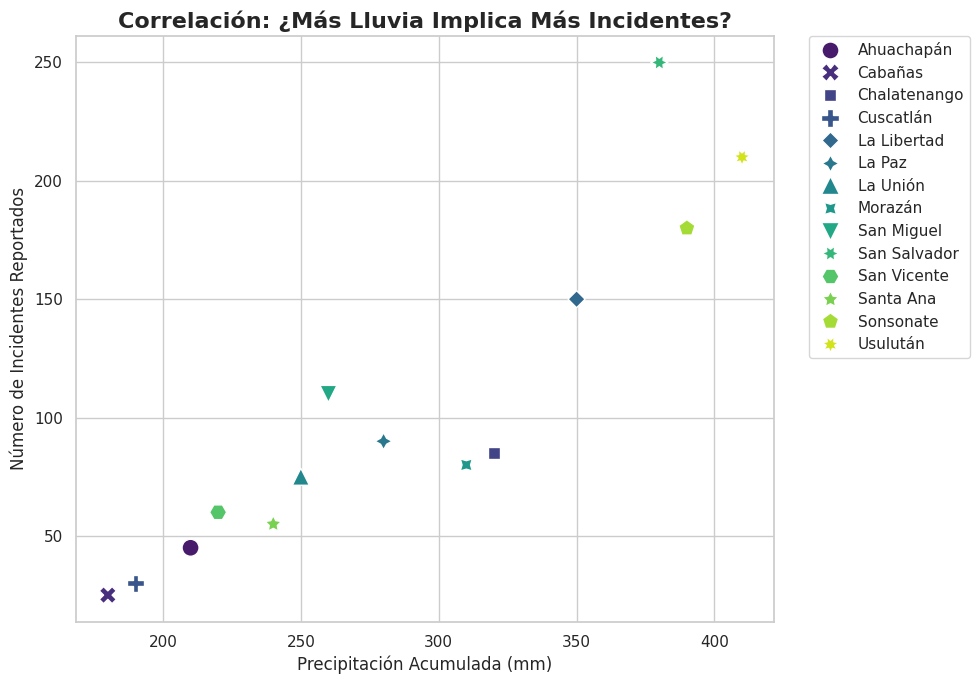

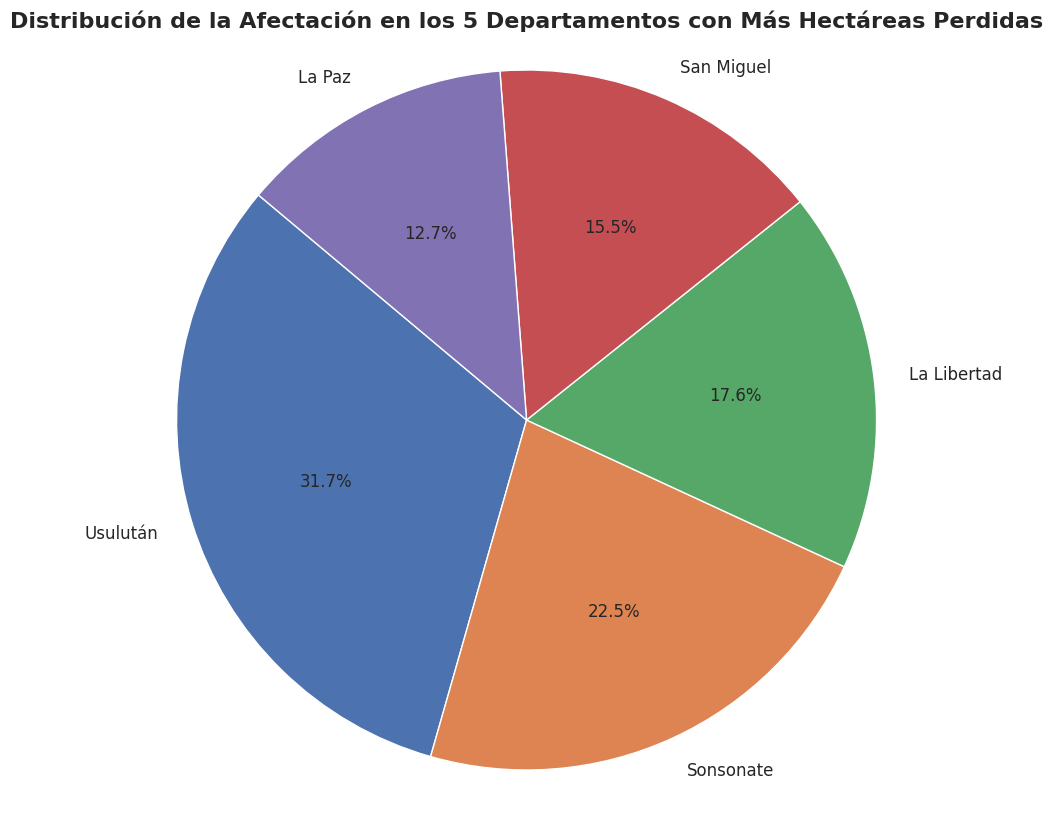


✅ Análisis completado.


In [ ]:

!pip install geopandas matplotlib pandas folium seaborn > /dev/null


import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display, HTML

print("✅ Herramientas listas para el análisis.")

datos_impacto = {
    'Departamento': [
        'Ahuachapán', 'Cabañas', 'Chalatenango', 'Cuscatlán', 'La Libertad',
        'La Paz', 'La Unión', 'Morazán', 'San Miguel', 'San Salvador',
        'San Vicente', 'Santa Ana', 'Sonsonate', 'Usulután'
    ],
    'Precipitacion_mm': [210, 180, 320, 190, 350, 280, 250, 310, 260, 380, 220, 240, 390, 410],
    'Incidentes_Reportados': [45, 25, 85, 30, 150, 90, 75, 80, 110, 250, 60, 55, 180, 210],
    'Hectareas_Afectadas': [800, 450, 1500, 500, 2500, 1800, 1200, 1600, 2200, 1100, 900, 1300, 3200, 4500]
}
df = pd.DataFrame(datos_impacto)
print("📊 Datos del evento de lluvias generados.")


print("\n" + "="*60)
print("            ANÁLISIS ESTADÍSTICO DEL IMPACTO NACIONAL")
print("="*60)


media_lluvia = df['Precipitacion_mm'].mean()
mediana_incidentes = df['Incidentes_Reportados'].median()
total_hectareas = df['Hectareas_Afectadas'].sum()
depto_mas_lluvia = df.loc[df['Precipitacion_mm'].idxmax()]
depto_mas_afectado = df.loc[df['Hectareas_Afectadas'].idxmax()]


stats_html = f"""
<div style="font-family: Arial, sans-serif; line-height: 1.6;">
    <p>Resultados clave a nivel nacional:</p>
    <ul>
        <li><b>Precipitación Promedio:</b> {media_lluvia:.2f} mm</li>
        <li><b>Mediana de Incidentes por Depto:</b> {mediana_incidentes} incidentes (el 50% de los deptos. tuvo más que esto)</li>
        <li><b>Total de Hectáreas Afectadas:</b> {total_hectareas:,.0f} Ha</li>
    </ul>
    <p><b>Departamento con mayor precipitación:</b> {depto_mas_lluvia['Departamento']} ({depto_mas_lluvia['Precipitacion_mm']} mm)</p>
    <p><b>Departamento con más hectáreas afectadas:</b> {depto_mas_afectado['Departamento']} ({depto_mas_afectado['Hectareas_Afectadas']:,.0f} Ha)</p>
</div>
"""
display(HTML(stats_html))
print("="*60)


sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
ax1 = sns.barplot(x='Precipitacion_mm', y='Departamento', data=df.sort_values('Precipitacion_mm', ascending=False), palette='Blues_r', hue='Departamento', dodge=False, legend=False)
ax1.set_title('Precipitación Acumulada por Departamento (mm)', fontsize=16, weight='bold')
ax1.set_xlabel('Precipitación (mm)')
ax1.set_ylabel('Departamento')

for container in ax1.containers:
    ax1.bar_label(container, fmt='%d mm', label_type='edge', padding=5, fontsize=10)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
ax2 = sns.barplot(x='Hectareas_Afectadas', y='Departamento', data=df.sort_values('Hectareas_Afectadas', ascending=False), palette='Reds_r', hue='Departamento', dodge=False, legend=False)
ax2.set_title('Hectáreas de Cultivo Afectadas', fontsize=16, weight='bold')
ax2.set_xlabel('Hectáreas (Ha)')
ax2.set_ylabel('Departamento')

for container in ax2.containers:
    ax2.bar_label(container, fmt='{:,.0f} Ha', label_type='edge', padding=5, fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 7))
ax3 = sns.scatterplot(x='Precipitacion_mm', y='Incidentes_Reportados', data=df, s=150, hue='Departamento', palette='viridis', style='Departamento', legend=True)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax3.set_title('Correlación: ¿Más Lluvia Implica Más Incidentes?', fontsize=16, weight='bold')
ax3.set_xlabel('Precipitación Acumulada (mm)')
ax3.set_ylabel('Número de Incidentes Reportados')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 10))
df_top5 = df.nlargest(5, 'Hectareas_Afectadas')
plt.pie(df_top5['Hectareas_Afectadas'], labels=df_top5['Departamento'], autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 12})
plt.title('Distribución de la Afectación en los 5 Departamentos con Más Hectáreas Perdidas', fontsize=16, weight='bold')
plt.axis('equal')
plt.show()

print("\n✅ Análisis completado.")